In [1]:
from timeit import default_timer as timer
from numba import config, njit, threading_layer
import numpy as np
from numba import jit
import math
import numba
import matplotlib.pyplot as plt
import time

from tabulate import tabulate



In [8]:

     
img=np.ndarray((3000,3000))

In [2]:
def my_mandel(x, y, max_iters):
    zx = 0
    zy = 0
    for i in range(max_iters):
        zx2 = zx*zx
        zy2 = zy*zy
        zxy = 2*zx*zy
        zx = zx2 - zy2 + x
        zy = zxy + y
        if (zx2 + zy2) >= 4:
            return i
    return 150

In [3]:
@jit(nopython=True)
def gpu_mandel(x, y, max_iters):
    zx = 0
    zy = 0
    for i in range(max_iters):
        zx2 = zx*zx
        zy2 = zy*zy
        zxy = 2*zx*zy
        zx = zx2 - zy2 + x
        zy = zxy + y
        if (zx2 + zy2) >= 4:
            return i
    return max_iters
@jit(nopython=True)
def gpu_mandel_complex(x, y, max_iters):
    p = complex(x,y)
    z=complex(0,0)
    for i in range(max_iters):
        z= z*z +p
        if abs(z) >= 4:
            return i
    return max_iters    

In [11]:
def measure_time_gpu(s):
    n=1000+300*s
    for i in range(1000+300*s):
        for j in range(1000+300*s):
            x = 2*(i-n/2)/n
            y = 2*(j-n/2)/n
            img[j][i] = gpu_mandel(x,y,150)
    

In [12]:
def measure_time_cpu(s):
    n=1000+300*s
    for i in range(1000+300*s):
        for j in range(1000+300*s):
            x = 2*(i-n/2)/n
            y = 2*(j-n/2)/n
            img[j][i] = my_mandel(x,y,150)

In [27]:
times_cpu = []
for i in range(10):
    start = time.time()
    for j in range(1):
        measure_time_cpu(i)
    end = time.time()-start
    times_cpu.append(end/1)

In [26]:
times_gpu= []
for i in range(10):
    start = time.time()
    for j in range(2):
        measure_time_gpu(i)
    end = time.time()-start
    times_gpu.append(end/2)

In [18]:
X=[1000+300*i for i in range(10)]

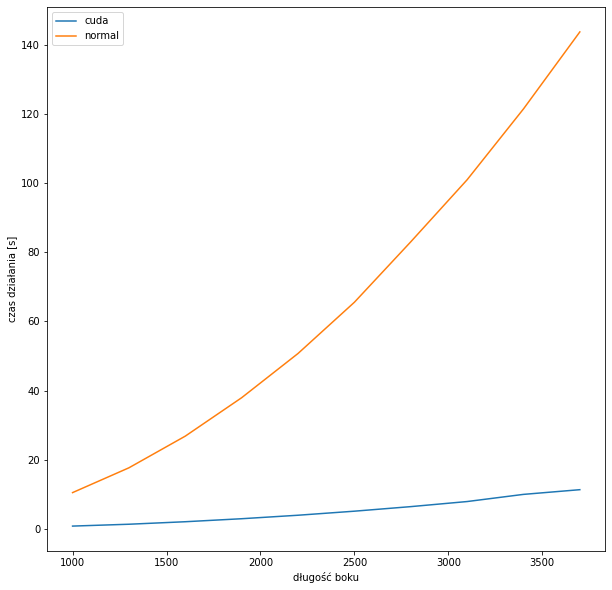

In [28]:
plt.figure(figsize=(10,10))
plt.plot(X, times_gpu)
plt.plot(X, times_cpu)
plt.xlabel("długość boku")
plt.ylabel("czas działania [s]")
plt.legend(["cuda", "normal"])


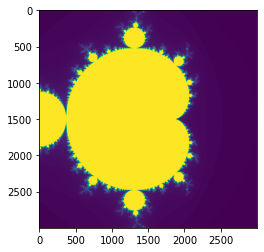

In [16]:
plt.imshow(img)